# College Majors Data Analysis

Analyzing data of recent college graduates to help pick a major, examining gender disparity in STEM majors, and asking interesting questions about how men and women pick their majors. This data was collected in 2011-12 by the US government.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline

sns.set_style('whitegrid')

## Downloading the dataset

The dataset is available at https://github.com/fivethirtyeight/data/tree/master/college-majors. You can download all the csv files or just the ones that interest you and help you answer specific questions.

In [2]:
recent_grads = pd.read_csv(r'G:\projects\datasets\college-majors\college-majors\recent-grads.csv')

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(recent_grads)

Rank  Major_code                                              Major  \
0       1        2419                              PETROLEUM ENGINEERING   
1       2        2416                     MINING AND MINERAL ENGINEERING   
2       3        2415                          METALLURGICAL ENGINEERING   
3       4        2417          NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4       5        2405                               CHEMICAL ENGINEERING   
5       6        2418                                NUCLEAR ENGINEERING   
6       7        6202                                  ACTUARIAL SCIENCE   
7       8        5001                         ASTRONOMY AND ASTROPHYSICS   
8       9        2414                             MECHANICAL ENGINEERING   
9      10        2408                             ELECTRICAL ENGINEERING   
10     11        2407                               COMPUTER ENGINEERING   
11     12        2401                              AEROSPACE ENGINEERING   
12     13        2404                             BIOMEDICAL ENGINEERING   
13     14        5008                                  MATERIALS SCIENCE   
14     15        2409          ENGINEERING MECHANICS PHYSICS AND SCIENCE   
15     16        2402                             BIOLOGICAL ENGINEERING   
16     17        2412           INDUSTRIAL AND MANUFACTURING ENGINEERING   
17     18        2400                                GENERAL ENGINEERING   
18     19        2403                          ARCHITECTURAL ENGINEERING   
19     20        3201                                    COURT REPORTING   
20     21        2102                                   COMPUTER SCIENCE   
21     22        1104                                       FOOD SCIENCE   
22     23        2502                  ELECTRICAL ENGINEERING TECHNOLOGY   
23     24        2413        MATERIALS ENGINEERING AND MATERIALS SCIENCE   
24     25        6212      MANAGEMENT INFORMATION SYSTEMS AND STATISTICS   
25     26        2406                                  CIVIL ENGINEERING   
26     27        5601                              CONSTRUCTION SERVICES   
27     28        6204                OPERATIONS LOGISTICS AND E-COMMERCE   
28     29        2499                          MISCELLANEOUS ENGINEERING   
29     30        5402                                      PUBLIC POLICY   
30     31        2410                          ENVIRONMENTAL ENGINEERING   
31     32        2500                           ENGINEERING TECHNOLOGIES   
32     33        6099                            MISCELLANEOUS FINE ARTS   
33     34        2411             GEOLOGICAL AND GEOPHYSICAL ENGINEERING   
34     35        6107                                            NURSING   
35     36        6207                                            FINANCE   
36     37        5501                                          ECONOMICS   
37     38        6205                                 BUSINESS ECONOMICS   
38     39        2503                 INDUSTRIAL PRODUCTION TECHNOLOGIES   
39     40        5102  NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...   
40     41        6201                                         ACCOUNTING   
41     42        3700                                        MATHEMATICS   
42     43        2100                   COMPUTER AND INFORMATION SYSTEMS   
43     44        5007                                            PHYSICS   
44     45        6105                   MEDICAL TECHNOLOGIES TECHNICIANS   
45     46        2105                               INFORMATION SCIENCES   
46     47        3702                    STATISTICS AND DECISION SCIENCE   
47     48        3701                                APPLIED MATHEMATICS   
48     49        3607                                       PHARMACOLOGY   
49     50        5006                                       OCEANOGRAPHY   
50     51        2501              ENGINEERING AND INDUSTRIAL MANAGEMENT   
51     52        6104                         MEDICAL

Looking at the data above, few columns are particularly interesting, namely *ShareWomen*, *Sample_size*, *Median* and *Unemployment_rate*, along with the *Men* and *Women* columns. We will use the DATA DICTIONARY provided with the dataset to make sense of the column names.

In [4]:
recent_grads.shape

(173, 21)

`recent_grads` contains 173 rows and 21 columns. Each row contains a unique major, so data was collected about 173 majors in total.

In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

Above is the list of columns in out dataset with the kind of data stored in those columns. *Major* and *Major_category* are of type `object` because they store string values.

In [6]:
recent_grads.Major_category.unique().tolist()

['Engineering',
 'Business',
 'Physical Sciences',
 'Law & Public Policy',
 'Computers & Mathematics',
 'Agriculture & Natural Resources',
 'Industrial Arts & Consumer Services',
 'Arts',
 'Health',
 'Social Science',
 'Biology & Life Science',
 'Education',
 'Humanities & Liberal Arts',
 'Psychology & Social Work',
 'Communications & Journalism',
 'Interdisciplinary']

Above is the list of categories of majors. There are 16 Major Categories, each with multiple majors.

## Data Preparation and Cleaning

We check for missing data in out dataset and decide how to proceed with handling it.

In [7]:
recent_grads.isna().any()

Rank                    False
Major_code              False
Major                   False
Total                    True
Men                      True
Women                    True
Major_category          False
ShareWomen               True
Sample_size             False
Employed                False
Full_time               False
Part_time               False
Full_time_year_round    False
Unemployed              False
Unemployment_rate       False
Median                  False
P25th                   False
P75th                   False
College_jobs            False
Non_college_jobs        False
Low_wage_jobs           False
dtype: bool

There are NaN values in *Total*, *Men*, *Women* and *ShareWomen* columns

In [8]:
recent_grads[recent_grads.isna().any(axis=1)]

Rank  Major_code         Major  Total  Men  Women  \
21    22        1104  FOOD SCIENCE    NaN  NaN    NaN   

                     Major_category  ShareWomen  Sample_size  Employed  ...  \
21  Agriculture & Natural Resources         NaN           36      3149  ...   

    Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
21       1121                  1735         338           0.096931   53000   

    P25th  P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
21  32000  70000          1183              1274            485  

[1 rows x 21 columns]

Looks like just 1 row has NaNs with major as FOOD SCIENCE. And since it has a pretty low *Sample_size*, we can drop it from the dataset without losing too much valubale information.

In [9]:
recent_grads.dropna(inplace=True)

In [10]:
recent_grads.describe()

Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     172.000000     172.000000     172.000000   
mean    87.377907  3895.953488   39370.081395   16723.406977   22646.674419   
std     49.983181  1679.240095   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2403.750000    4549.750000    2177.500000    1778.250000   
50%     87.500000  3608.500000   15104.000000    5434.000000    8386.500000   
75%    130.250000  5503.250000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size      Employed      Full_time      Part_time  \
count  172.000000   172.000000     172.00000     172.000000     172.000000   
mean     0.522223   357.941860   31355.80814   26165.767442    8877.232558   
std      0.231205   619.680419   50777.42865   42957.122320   14679.038729   
min      0.000000     2.000000       0.00000     111.000000       0.000000   
25%      0.336026    42.000000    3734.75000    3181.000000    1013.750000   
50%      0.534024   131.000000   12031.50000   10073.500000    3332.500000   
75%      0.703299   339.000000   31701.25000   25447.250000    9981.000000   
max      0.968954  4212.000000  307933.00000  251540.000000  115172.000000   

       Full_time_year_round    Unemployed  Unemployment_rate         Median  \
count            172.000000    172.000000         172.000000     172.000000   
mean           19798.843023   2428.412791           0.068024   40076.744186   
std            33229.227514   4121.730452           0.030340   11461.388773   
min              111.000000      0.000000           0.000000   22000.000000   
25%             2474.750000    299.500000           0.050261   33000.000000   
50%             7436.500000    905.000000           0.067544   36000.000000   
75%            17674.750000   2397.000000           0.087247   45000.000000   
max           199897.000000  28169.000000           0.177226  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    172.000000     172.000000     172.000000        172.000000   
mean   29486.918605   51386.627907   12387.401163      13354.325581   
std     9190.769927   14882.278650   21344.967522      23841.326605   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   41750.000000    1744.750000       1594.000000   
50%    27000.000000   47000.000000    4467.500000       4603.500000   
75%    33250.000000   58500.000000   14595.750000      11791.750000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs  
count     172.000000  
mean     3878.633721  
std      6960.467621  
min         0.000000  
25%       336.750000  
50%      1238.500000  
75%      3496.000000  
max     48207.000000

A brief statistical description of our data is given above. *Major_code* and *Rank*, though numerical, are identifiers and not interesting. However, *Sample_size* and *Median* are interesting.

Standard deviation of *Sample_size* is very high which tells us that the survey may be skewed and therefore when analyzing *Median* salaries and so on, we must take *Sample_size* into account.

Let's convert the strings in Major to title-case since it's better to look at than all capitalized:

In [11]:
recent_grads['Major'] = recent_grads['Major'].apply(str.title)

Since the dataset was already curated, we didn't have to go through much hassle to clean it. So let's move on to EDA.

## Exploratory Data Analysis and Visualization

### 1. Lets look at the distribution of Median salaries across all Majors.

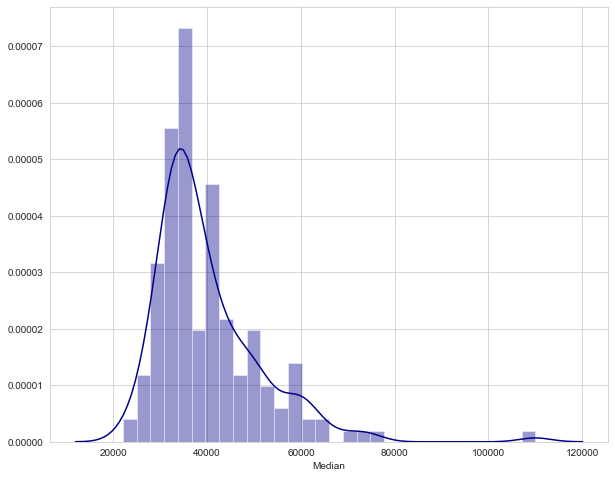

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(recent_grads.Median, color='darkblue', bins=30)

This tells us that the median salary of most majors are between 30K USD and 60K USD.

We can use `pairplot` to get an initial idea of how columns correlate to each other, but since our no. of columns are too many to plot and gain insights, we will refrain from it.

### 2. Major categories with gender breakdown

Text(0.5, 1.0, 'Major Categories with gender breakdown')

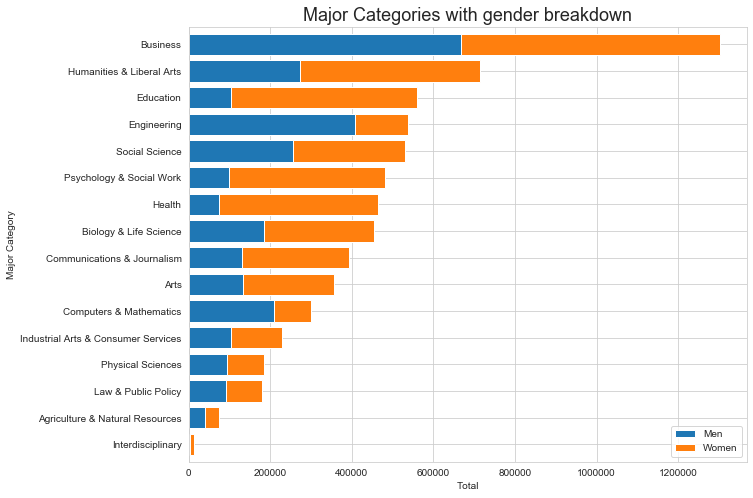

In [13]:
major_cat_gender_df = recent_grads.groupby('Major_category').sum().sort_values('Total')
major_cat_gender_df[['Men', 'Women']].plot(kind='barh', stacked=True, figsize=(10,8), width=0.8)
plt.ylabel('Major Category')
plt.xlabel('Total')
plt.title('Major Categories with gender breakdown', fontdict={'fontsize': 18})

- It is clear from the graph that the most popular *Major_category* is Business with a pretty even gender breakdown.
- Major_category skewed towards Men are: Engineering, Computer&Mathematics and Agriculture&Natural Resources
- All other Major_categories are either split even or skewed towards Women.

It'll be interesting to explore how these disparities relate to salaries

### 3. Top 20 most popular majors with gender breakdown

In [14]:
total_graduates_by_major = recent_grads.groupby('Major').sum().sort_values('Total', ascending=False).head(20).reset_index()

Text(0.5, 1.0, 'Top 20 most popular majors with gender breakdown')

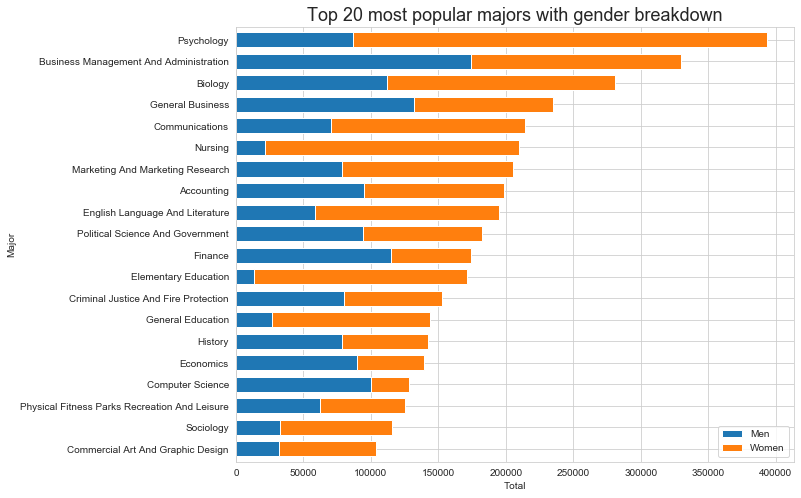

In [15]:
major_gender_df = total_graduates_by_major.sort_values('Total')[['Major', 'Men', 'Women']]
major_gender_df.set_index('Major', inplace=True)
major_gender_df.plot(kind='barh', stacked=True, figsize=(10,8), width=0.7)

plt.xlabel('Total')
plt.title('Top 20 most popular majors with gender breakdown', fontdict={'fontsize': 18})

- Psychology is the most popular major with high skewness towards Women.
- Computer Science looks like the most skewed towards Men
- Nursing, Elementary Education and General Education are most skewed towards Women
- Business Management & Administration and General Business are split even (as was the Business Major_category)

### 4. Majors with highest gender disparity

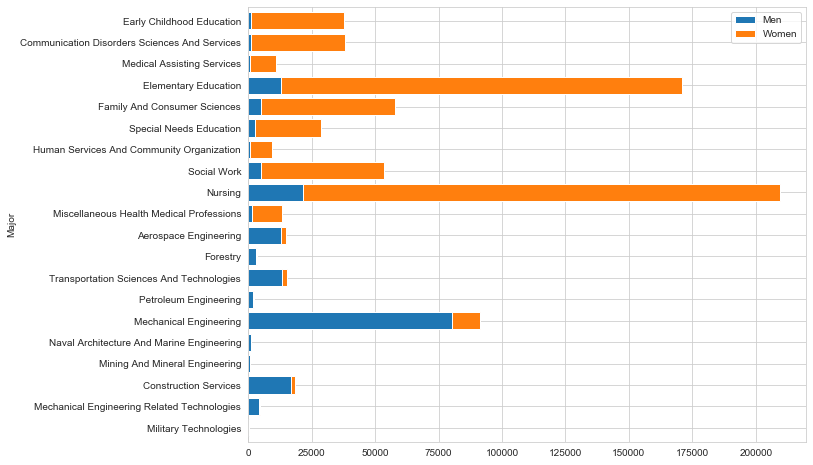

In [16]:
skewed_by_major = recent_grads.sort_values('ShareWomen').head(10)
skewed_by_major = skewed_by_major.append(recent_grads.sort_values('ShareWomen').tail(10))
skewed_by_major.set_index('Major', inplace=True)

skewed_by_major[['Men', 'Women']].plot(kind='barh', stacked=True, figsize=(10,8), width=0.8)

- First 10 majors are skewed towards Women while the bottom 10 are skewed towards Men.
- Majors that are skewed towards Women are generally of Education, Health, Communication and Social Sciences categories.
- Majors that are skewed towards Men are generally of Engineering and Outdoors(Forestry, Construction) categories.

### 5. Median salary variation in each Major_category

(0, 120000)

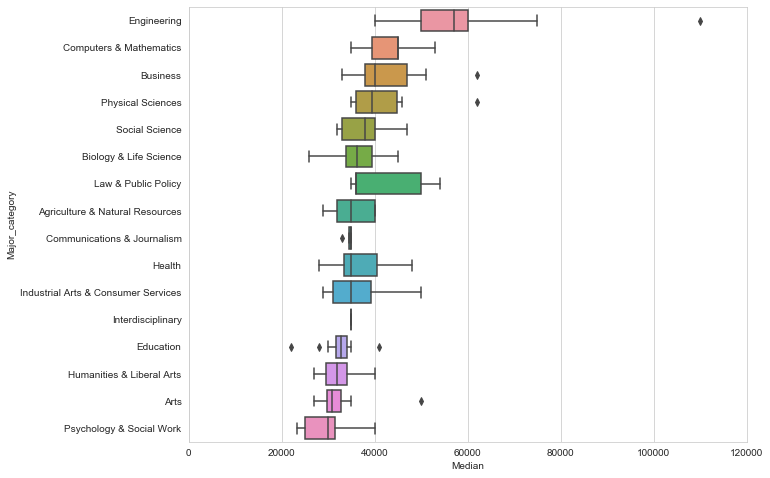

In [17]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

grouped = recent_grads.loc[:, ['Major_category', 'Median']] \
            .groupby('Major_category') \
            .median() \
            .sort_values(by='Median', ascending=False)

sns.boxplot(x='Median', y='Major_category', data=recent_grads, order=grouped.index)

plt.xlim(0, 120000)
#TODO: Add $ sign and round xlabels with 'K' for thousands e.g 30K, 40K, etc.

- STEM Major_categories along with Business are highest earners with Engineering at the top which varies between 40K USD and just below 80K USD with median at just below 60K USD.
- Engineering is also the lesser favored Major_category of Women as was clear in previous graphs.

### 6. Top 20 highest and lowest earning majors (irrespective of Sample_size)

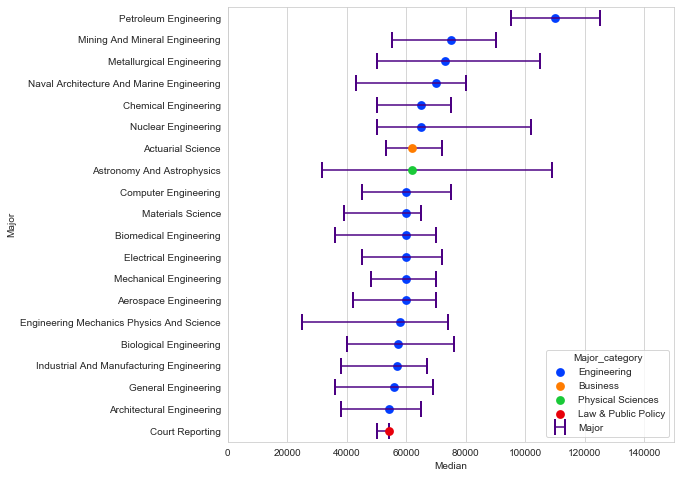

In [18]:
highest_earning_majors = recent_grads[['Major', 'Major_category', 'Median', 'P25th', 'P75th', 'Sample_size']] \
            .sort_values('Median', ascending=False).head(20)

plt.figure(figsize=(8,8))
plt.xlim(left=0, right=150000)

dx = np.array([highest_earning_majors.Median - highest_earning_majors.P25th,
         highest_earning_majors.P75th - highest_earning_majors.Median])

plt.errorbar(x='Median', y='Major', xerr=dx,
             data=highest_earning_majors, fmt='none',
             ecolor='indigo', capsize=8, capthick=2, barsabove=False)
sns.pointplot(x='Median', y='Major', hue='Major_category', data=highest_earning_majors, join=False, palette='bright')

#TODO: Draw error bars on each point with P25 and P75 as caps

- No surprise that most of the highest earning majors belong to Engineering and Physical Sciences Major_category
- Interesting that the only non-STEM major in top 20 earnings is Court Reporting.
- Errorbars indicate the 25th percentile and 75th percentile (-/+) salary of that major (inter-quartile range).
    - Median salaried vary a lot in Astronomy, Nuclear Engg and Metallurgical Engg which can be reasoned with people taking up academic positions or taking corporate high-paying jobs

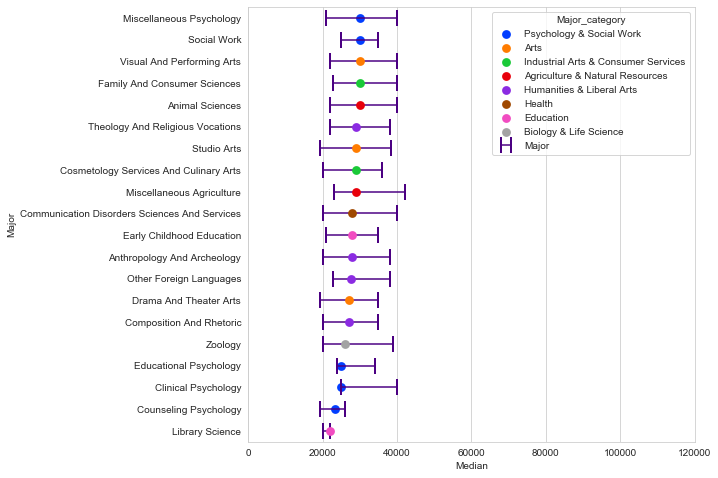

In [19]:
lowest_earning_majors = recent_grads[['Major', 'Major_category', 'Median', 'P25th', 'P75th', 'Sample_size']] \
            .sort_values('Median', ascending=False).tail(20)

plt.figure(figsize=(8,8))
plt.xlim(left=0, right=120000)

dx = np.array([lowest_earning_majors.Median - lowest_earning_majors.P25th,
         lowest_earning_majors.P75th - lowest_earning_majors.Median])

plt.errorbar(x='Median', y='Major', xerr=dx,
             data=lowest_earning_majors, fmt='none',
             ecolor='indigo', capsize=8, capthick=2, barsabove=False)

sns.pointplot(x='Median', y='Major', hue='Major_category', data=lowest_earning_majors,
              join=False, palette='bright')

#TODO: Draw error bars on each point with P25 and P75 as caps

- Lowest 20 earning majors belong to a variety of Major_categories but most belong to Arts, with Library Science coming in -last.
- Errorbars indicate the 25th and 75th percentile (inter-quartile range).
    - As compared to highest earning majors, here the variance is pretty consistent and is between 20K USD and 40K USD.

### 7. Median Salary by Major_category taking Sample_size and ShareWomen into account

In [20]:
recent_grads['SS*Median'] = recent_grads.Median * recent_grads.Sample_size

In [21]:
most_skewed_by_gender = recent_grads.groupby('Major_category').sum()[['Total', 'Men', 'Women']]

most_skewed_by_gender['ShareWomen'] = most_skewed_by_gender.Women / most_skewed_by_gender.Total
most_skewed_by_gender.sort_values('ShareWomen', ascending=False)

most_skewed_by_gender['WtdMedian'] = recent_grads.groupby('Major_category').sum()['SS*Median'] / recent_grads.groupby('Major_category').sum()['Sample_size']

In [22]:
most_skewed_by_gender.sort_values('ShareWomen', ascending=False)

Total       Men     Women  \
Major_category                                                       
Health                                463230.0   75517.0  387713.0   
Education                             559129.0  103526.0  455603.0   
Psychology & Social Work              481007.0   98115.0  382892.0   
Interdisciplinary                      12296.0    2817.0    9479.0   
Communications & Journalism           392601.0  131921.0  260680.0   
Arts                                  357130.0  134390.0  222740.0   
Humanities & Liberal Arts             713468.0  272846.0  440622.0   
Biology & Life Science                453862.0  184919.0  268943.0   
Industrial Arts & Consumer Services   229792.0  103781.0  126011.0   
Social Science                        529966.0  256834.0  273132.0   
Law & Public Policy                   179107.0   91129.0   87978.0   
Business                             1302376.0  667852.0  634524.0   
Physical Sciences                     185479.0   95390.0   90089.0   
Agriculture & Natural Resources        75620.0   40357.0   35263.0   
Computers & Mathematics               299008.0  208725.0   90283.0   
Engineering                           537583.0  408307.0  129276.0   

                                     ShareWomen     WtdMedian  
Major_category                                                 
Health                                 0.836977  43693.740419  
Education                              0.814844  32363.517503  
Psychology & Social Work               0.796022  31234.402516  
Interdisciplinary                      0.770901  35000.000000  
Communications & Journalism            0.663982  34738.243123  
Arts                                   0.623694  32045.858896  
Humanities & Liberal Arts              0.617578  32192.322097  
Biology & Life Science                 0.592566  34378.549849  
Industrial Arts & Consumer Services    0.548370  34185.588915  
Social Science                         0.515376  39200.371098  
Law & Public Policy                    0.491204  35635.142119  
Business                               0.487205  40889.841986  
Physical Sciences                      0.485710  38477.396658  
Agriculture & Natural Resources        0.466318  35586.142322  
Computers & Mathematics                0.301942  46993.426573  
Engineering                            0.240476  55915.854649

In [23]:
most_skewed_by_gender[['ShareWomen', 'WtdMedian']].corr()

ShareWomen  WtdMedian
ShareWomen    1.000000  -0.647767
WtdMedian    -0.647767   1.000000

There's a definite negative correlation (-0.64) between the percentage of women in major_categories vs weighted median salaries of corresponding major_categories.

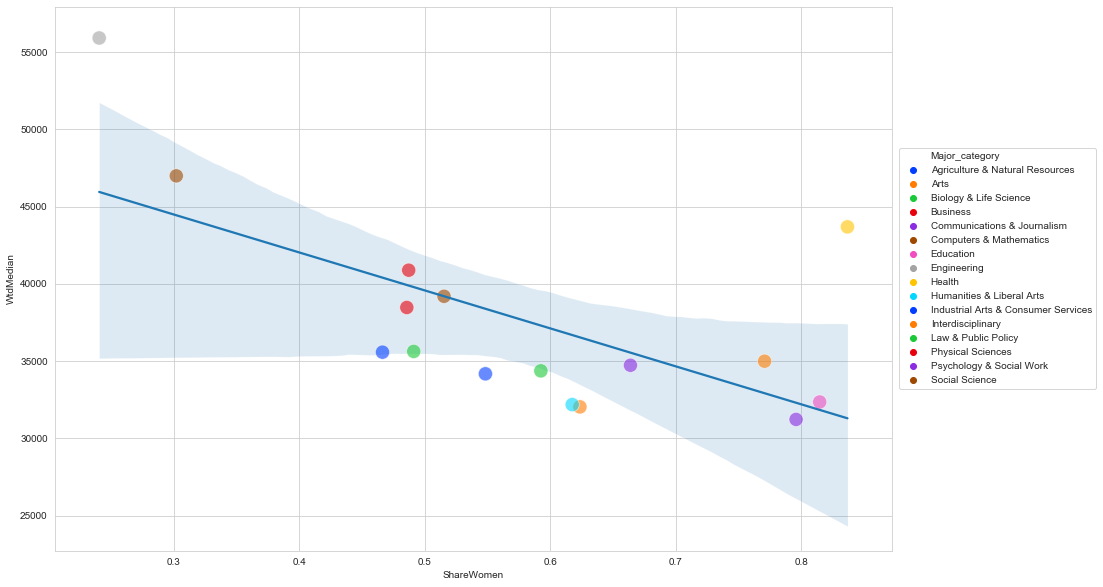

In [24]:
plt.figure(figsize=(15,10))

sns.regplot(x='ShareWomen', y='WtdMedian', data=most_skewed_by_gender, scatter=False)
sns.scatterplot(x='ShareWomen', y='WtdMedian', data=most_skewed_by_gender, hue=most_skewed_by_gender.index,
                palette='bright', alpha=0.6, s=200)

plt.legend(loc='upper right', bbox_to_anchor=(1.25,0.75))

- We use a weighted median method to calculate *WtdMedian* relative to *Sample_size* and plot it against *ShareWomen* with hue of *Major_category*
- Right away a disparity is clear, Engineering, the most paying Major_category has the lowest share of Women
- The most preferred Major_category by women do not pay well except Health



### 8. Regression plot on the basis of ShareWomen, Sample_size, Median and Major_category

In [25]:
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objs as go

fig = px.scatter(recent_grads, x='ShareWomen', y='Median',
                 size='Sample_size', color='Major_category',
                 hover_name='Major', size_max=30, range_y=[0, 120000],
                 range_x=[0, 1], color_discrete_sequence=px.colors.qualitative.Set1)
fig2 = px.scatter(recent_grads, x='ShareWomen', y='Median', trendline='ols')
trendline = fig2.data[1]
fig.add_trace(trendline)

fig.show()

- The size of the circles are relative to the *Sampl_size* of median salary data collected for a particular major

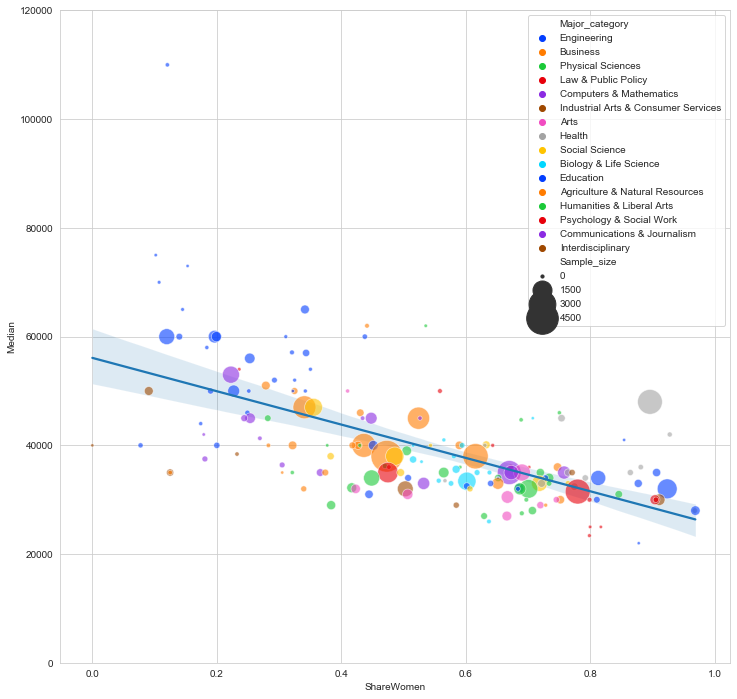

In [26]:
plt.figure(figsize=(12,12))
plt.ylim(0,120000)
sns.regplot(x='ShareWomen', y='Median', data=recent_grads, scatter=False)
sns.scatterplot(x='ShareWomen', y='Median', data=recent_grads, hue='Major_category',
                size='Sample_size', sizes=(10, 1000), alpha=0.6, palette='bright')

#TODO: Make this graph interactive with plotly

This plot provides a lot of information, so lets break it down:
- There seems to be a slight but definite negative correlation between *Median* and *ShareWomen*
- We plotted all the Major_categories with the size of dots relative to their *Sample_size*.
- Health sector looks like a lucrative Major_category to Women with high *ShareWomen* and high *Median* salary as well and seems like an outlier, but isn't because the *Sample_size* is high too.
- Petroleum Engineering's size is small because of low *Sample_size* but at highest *Median*.

### 9. Unemployment analysis by Major

#### 9.1 Highest unemployment rate by majors

(0, 0.2)

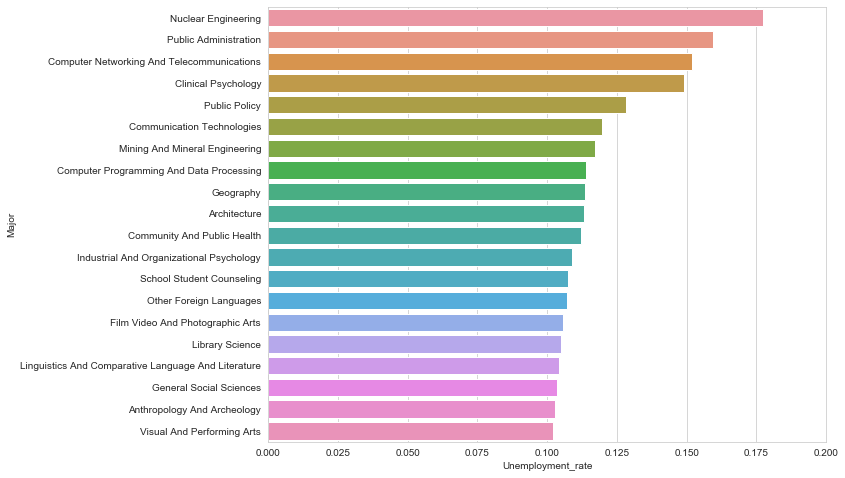

In [27]:
unemp = recent_grads.sort_values('Unemployment_rate', ascending=False)
plt.figure(figsize=(10,8))

sns.barplot(x='Unemployment_rate', y='Major', data=unemp.head(20))
plt.xlim(0, 0.2)

#### 9.2 Lowest unemployment rate by major

(0, 0.2)

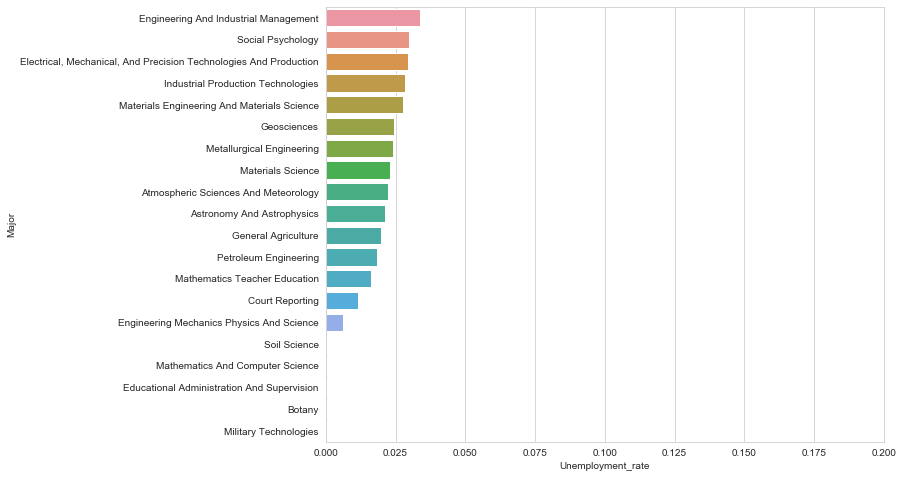

In [28]:
plt.figure(figsize=(10,8))

sns.barplot(x='Unemployment_rate', y='Major', data=unemp.tail(20))
plt.xlim(0, 0.2)

- Unemployment_rate of some majors is 0 percent. This means that either the Soil Science, Educational Administration and Botany businesses are **booming**, or somebody missed a trick while data collection. In any case, since we don't have the raw data, we assume this data to be perfect. 

- Military Technologies data cannot be trusted since the no. of Employed people is also for that major.

### 10. Unemployment rate by Major_category

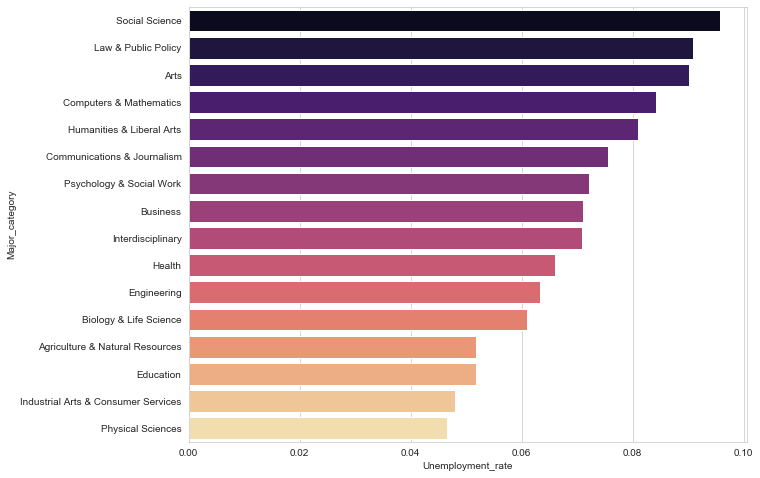

In [29]:
unemp_by_cat = recent_grads.groupby('Major_category').mean().sort_values('Unemployment_rate', ascending=False)

plt.figure(figsize=(10,8))

sns.barplot(data= unemp_by_cat, x='Unemployment_rate', y=unemp_by_cat.index, palette='magma')

- Unemployment rate of Computers&Mathematics is worryingly high since we've established those are high paying jobs.

### 11. How many people are employed at a job which requires a college degree?

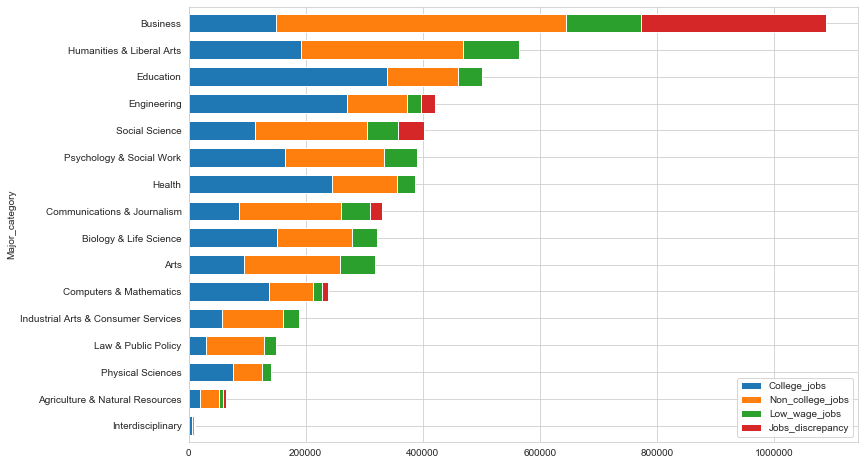

In [30]:
#TODO: College_jobs....
type_of_job = recent_grads.groupby('Major_category').sum().sort_values('Employed')
type_of_job['Jobs_discrepancy'] = type_of_job.Employed - (type_of_job.College_jobs + type_of_job.Non_college_jobs + type_of_job.Low_wage_jobs)
type_of_job['Jobs_discrepancy'] = type_of_job['Jobs_discrepancy'].apply(lambda x: x if x>0 else 0)

type_of_job[['College_jobs', 'Non_college_jobs', 'Low_wage_jobs', 'Jobs_discrepancy']].plot(kind='barh',
                                                                                            stacked=True,
                                                                                            figsize=(12,8), width=0.7)

- As is clear from above graph, a high percentage of Business major graduates are employed at a job which do not require a college degree
- The only *Major_categories* where people are employed at a job which requires a college degree are in the majority are Education, Engineering and Health, which makes sense.
- There is some discrepancies in *Employed* columns and *College_jobs*, *Non_college_jobs* and *Low_wage_jobs* columns. Hence, I've added a discrepancy column where the numbers don't quite add up but it is clear from the plot that most jobs are in Business, which is almost double of the second-most.

### 12. Women in STEM vs non-STEM majors

In [31]:
stem = pd.read_csv("G:\projects\datasets\college-majors\college-majors\women-stem.csv")
stem.Major = stem.Major.apply(str.title)
non_stem = recent_grads[~recent_grads.Major_code.isin(stem.Major_code)]
non_stem = non_stem[stem.columns]

In [32]:
stem

Rank  Major_code                                          Major  \
0      1        2419                          Petroleum Engineering   
1      2        2416                 Mining And Mineral Engineering   
2      3        2415                      Metallurgical Engineering   
3      4        2417      Naval Architecture And Marine Engineering   
4      5        2418                            Nuclear Engineering   
..   ...         ...                                            ...   
71    72        3604                                        Ecology   
72    73        6109                  Treatment Therapy Professions   
73    74        6100            General Medical And Health Services   
74    75        6102  Communication Disorders Sciences And Services   
75    76        3609                                        Zoology   

            Major_category  Total    Men  Women  ShareWomen  Median  
0              Engineering   2339   2057    282    0.120564  110000  
1              Engineering    756    679     77    0.101852   75000  
2              Engineering    856    725    131    0.153037   73000  
3              Engineering   1258   1123    135    0.107313   70000  
4              Engineering   2573   2200    373    0.144967   65000  
..                     ...    ...    ...    ...         ...     ...  
71  Biology & Life Science   9154   3878   5276    0.576360   33000  
72                  Health  48491  13487  35004    0.721866   33000  
73                  Health  33599   7574  26025    0.774577   32400  
74                  Health  38279   1225  37054    0.967998   28000  
75  Biology & Life Science   8409   3050   5359    0.637293   26000  

[76 rows x 9 columns]

In [33]:
stem[stem['Total'] > 10000].sort_values('Median', ascending=False).head(20)

Rank  Major_code                                              Major  \
5      6        2405                               Chemical Engineering   
10    11        2407                               Computer Engineering   
12    13        2404                             Biomedical Engineering   
7      8        2414                             Mechanical Engineering   
9     10        2408                             Electrical Engineering   
8      9        2401                              Aerospace Engineering   
15    16        2412           Industrial And Manufacturing Engineering   
16    17        2400                                General Engineering   
18    19        2102                                   Computer Science   
19    20        2502                  Electrical Engineering Technology   
22    23        2406                                  Civil Engineering   
26    27        6107                                            Nursing   
29    30        2105                               Information Sciences   
30    31        2100                   Computer And Information Systems   
31    32        5007                                            Physics   
33    34        3700                                        Mathematics   
36    37        6105                   Medical Technologies Technicians   
40    41        6104                         Medical Assisting Services   
48    49        3603                                  Molecular Biology   
49    50        6108  Pharmacy Pharmaceutical Sciences And Administr...   

             Major_category   Total    Men   Women  ShareWomen  Median  
5               Engineering   32260  21239   11021    0.341631   65000  
10              Engineering   41542  33258    8284    0.199413   60000  
12              Engineering   14955   8407    6548    0.437847   60000  
7               Engineering   91227  80320   10907    0.119559   60000  
9               Engineering   81527  65511   16016    0.196450   60000  
8               Engineering   15058  12953    2105    0.139793   60000  
15              Engineering   18968  12453    6515    0.343473   57000  
16              Engineering   61152  45683   15469    0.252960   56000  
18  Computers & Mathematics  128319  99743   28576    0.222695   53000  
19              Engineering   11565   8181    3384    0.292607   52000  
22              Engineering   53153  41081   12072    0.227118   50000  
26                   Health  209394  21773  187621    0.896019   48000  
29  Computers & Mathematics   11913   9005    2908    0.244103   45000  
30  Computers & Mathematics   36698  27392    9306    0.253583   45000  
31        Physical Sciences   32142  23080    9062    0.281936   45000  
33  Computers & Mathematics   72397  39956   32441    0.448099   45000  
36                   Health   15914   3916   11998    0.753927   45000  
40                   Health   11123    803   10320    0.927807   42000  
48   Biology & Life Science   18300   7426   10874    0.594208   40000  
49                   Health   23551   8697   14854    0.630716   40000

Text(0.5, 1.0, 'Sorted by Median salary (high to low)')

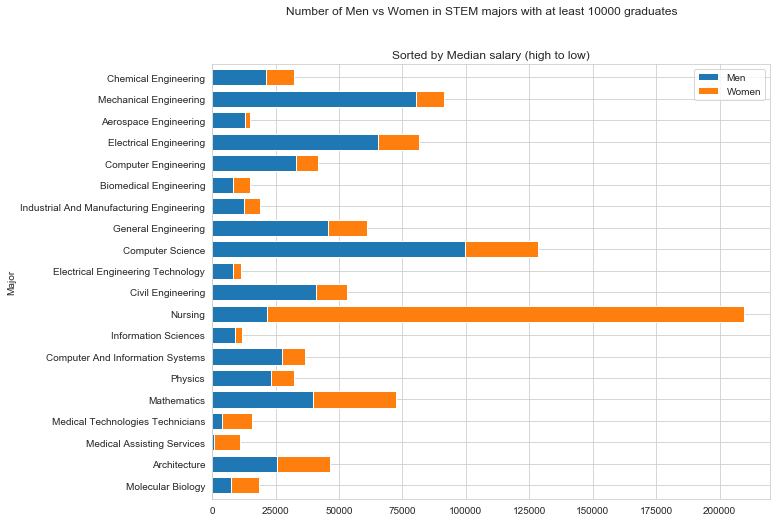

In [34]:
stem[stem['Total'] > 10000].set_index('Major').sort_values('Median').tail(20)[['Men', 'Women']].plot(kind='barh', stacked=True, figsize=(10,8), width=0.75)
plt.suptitle('Number of Men vs Women in STEM majors with at least 10000 graduates')
plt.title('Sorted by Median salary (high to low)')

- Highest paying STEM major with at least 10000 graduates is Chemical Engineering.
- Most majors in STEM category are skewed towards Men.
- Majors in Health sector, Architecture and Mathematics are either split evenly or skewed towards Women, particularly Nursing which is dominated by Women and is highly paid as well.

In [35]:
non_stem[non_stem['Total'] > 10000].set_index('Major').sort_values(by=['Median', 'Women'], ascending=False).head(20)

Rank  Major_code  \
Major                                                               
Management Information Systems And Statistics      25        6212   
Operations Logistics And E-Commerce                28        6204   
Construction Services                              27        5601   
Finance                                            36        6207   
Economics                                          37        5501   
Business Economics                                 38        6205   
Accounting                                         41        6201   
International Relations                            57        5505   
General Business                                   58        6200   
International Business                             60        6210   
Miscellaneous Business & Medical Administration    63        6299   
Agriculture Production And Management              64        1101   
General Agriculture                                65        1100   
Business Management And Administration             77        6203   
Marketing And Marketing Research                   78        6206   
Political Science And Government                   79        5506   
Geography                                          80        5504   
Human Resources And Personnel Management           87        6209   
Pre-Law And Legal Studies                          88        3202   
Communications                                     94        1901   

                                                                      Major_category  \
Major                                                                                  
Management Information Systems And Statistics                               Business   
Operations Logistics And E-Commerce                                         Business   
Construction Services                            Industrial Arts & Consumer Services   
Finance                                                                     Business   
Economics                                                             Social Science   
Business Economics                                                          Business   
Accounting                                                                  Business   
International Relations                                               Social Science   
General Business                                                            Business   
International Business                                                      Business   
Miscellaneous Business & Medical Administration                             Business   
Agriculture Production And Management                Agriculture & Natural Resources   
General Agriculture                                  Agriculture & Natural Resources   
Business Management And Administration                                      Business   
Marketing And Marketing Research                                            Business   
Political Science And Government                                      Social Science   
Geography                                                             Social Science   
Human Resources And Personnel Management                                    Business   
Pre-Law And Legal Studies                                        Law & Public Policy   
Communications                                           Communications & Journalism   

                                                    Total       Men     Women  \
Major                                                                           
Management Information Systems And Statistics     18713.0   13496.0    5217.0   
Operations Logistics And E-Commerce               11732.0    7921.0    3811.0   
Construction Services                             18498.0   16820.0    1678.0   
Finance                                          174506.0  115030.0   59476.0   
Economics                                        139247.0   89749.0   49498.0   
Business Economics        

Text(0.5, 1.0, 'Sorted by Median salary (high to low)')

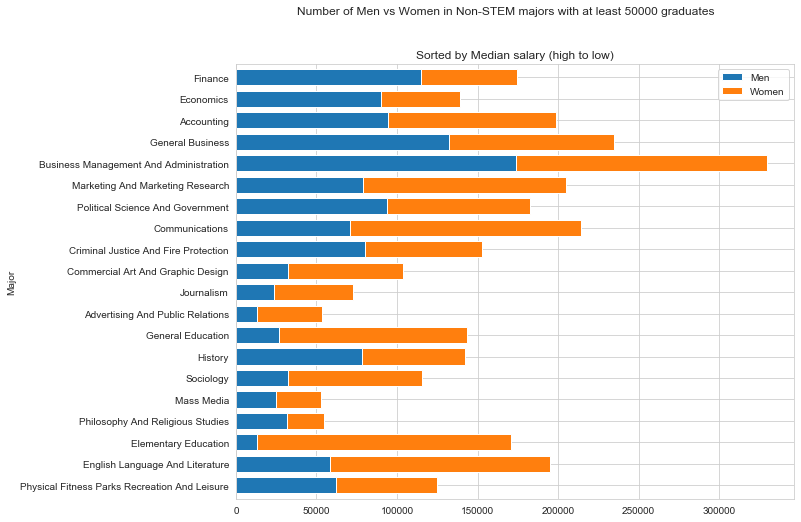

In [36]:
non_stem[non_stem['Total'] > 50000].set_index('Major').sort_values(by=['Median', 'Women']).tail(20)[['Men', 'Women']] \
                                    .plot(kind='barh', stacked=True, figsize=(10,8), width=0.75)
plt.suptitle('Number of Men vs Women in Non-STEM majors with at least 50000 graduates')
plt.title('Sorted by Median salary (high to low)')

- Since the total people graduating are a lot higher in Non-STEM majors (almost double) than STEM, we set the cut-off higher as well.
- Highest paying Non-STEM majors are Finance, Economics, Accounting and General Business which is to be expected since they are part of the Business Major_category.
- Pattern is pretty clear: most of them are either split evenly or skewed towards Women, except Finace and Economics but even there the split is not very skewed.

In [37]:
keys = stem.Major_code
i1 = recent_grads.set_index('Major_code').index
i2 = stem.set_index('Major_code').index
stem_ss = recent_grads[i1.isin(i2)]
non_stem_ss = recent_grads[~i1.isin(i2)]

Text(0.5, 1.0, 'Average Median salary of STEM and Non-STEM majors')

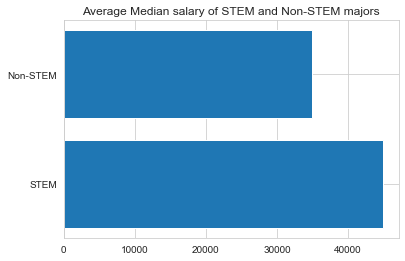

In [38]:
plt.barh(width=[stem_ss[stem_ss['Sample_size']>100].Median.mean(), non_stem_ss[non_stem_ss['Sample_size']>100].Median.mean()], y=['STEM', 'Non-STEM'],)
plt.title('Average Median salary of STEM and Non-STEM majors')

In [39]:
fig = px.pie(names=['Men', 'Women'], values=[stem.Men.sum(), stem.Women.sum()], 
             title='STEM graduates with gender breakdown')
fig.show()

In [40]:
fig = px.pie(names=['Women in STEM', 'Women in Non-STEM'], values=[stem.Women.sum(), non_stem.Women.sum()], 
             title='Total Women graduating with STEM vs Non-STEM breakdown')
fig.show()

## Conclusion

- We have conclusively seen that no. of women graduating in high paying STEM majors is quite low.
- STEM majors pay about `$10K` more than Non-STEM majors on an average with a Sample_size cutoff of 100 respondents. 
- Highest paying Non-STEM majors are from Business category.
- Highest paying major with highest share of women is Nursing with median salary of `$48K`.

## References

- TidyTuesday data analysis screencast code: https://github.com/dgrtwo/data-screencasts/blob/master/college-majors.Rmd
- A lot of StackOverflow surfing. That website is a boon for all developers.

In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
df = recent_grads.drop(['Rank', 'Major_code', 'Major_category', 'SS*Median'], axis=1).set_index('Major')

In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [70]:
X

array([[-0.58502141, -0.52304253, -0.5463086 , ..., -0.50996049,
        -0.54645674, -0.53105552],
       [-0.61002983, -0.57218562, -0.5513162 , ..., -0.56559219,
        -0.55095785, -0.5516601 ],
       [-0.60845002, -0.57054514, -0.54999712, ..., -0.56061165,
        -0.55436523, -0.5588645 ],
       ...,
       [-0.57713815, -0.57614417, -0.49774713, ..., -0.53570894,
        -0.52517112, -0.46924177],
       [-0.54889112, -0.56319864, -0.46293823, ..., -0.46912944,
        -0.50939621, -0.5144854 ],
       [-0.60462688, -0.59162175, -0.52964918, ..., -0.56850534,
        -0.54755047, -0.5311996 ]])

In [71]:
kmeans = KMeans(5)
pca = PCA(2)

In [72]:
X = pca.fit_transform(X)

In [73]:
X

array([[-2.84219575e+00,  1.00048912e+01],
       [-2.40515602e+00,  4.80000714e+00],
       [-2.51221799e+00,  5.05352115e+00],
       [-2.36234815e+00,  3.70769766e+00],
       [-7.90538593e-01,  3.46131497e+00],
       [-2.19810904e+00,  4.28136102e+00],
       [-2.07664387e+00,  2.92694104e+00],
       [-2.25277603e+00,  2.99784127e+00],
       [ 2.34992486e+00,  3.92745359e+00],
       [ 1.51568055e+00,  3.50978015e+00],
       [-3.18214621e-01,  3.30882008e+00],
       [-1.57033480e+00,  2.86665936e+00],
       [-1.52168790e+00,  1.91197202e+00],
       [-2.10987910e+00,  2.21890416e+00],
       [-2.10131316e+00,  1.93747517e+00],
       [-1.83356270e+00,  2.38760810e+00],
       [-1.36356172e+00,  2.09613091e+00],
       [ 5.55678932e-01,  2.44093222e+00],
       [-2.06478182e+00,  1.72335135e+00],
       [-2.24979918e+00,  2.29332140e+00],
       [ 4.09015479e+00,  3.11176513e+00],
       [-1.59471865e+00,  1.40353342e+00],
       [-2.08573365e+00,  1.47802062e+00],
       [-1.

In [74]:
X = kmeans.fit_transform(X)

In [75]:
X

array([[10.96314002, 13.81467964, 11.81920215, 22.02930053,  7.65604224],
       [ 5.75555689, 10.53984743,  6.91846401, 19.94488805,  2.50832149],
       [ 6.02503241, 10.74132678,  7.1906535 , 20.10357522,  2.78347958],
       [ 4.67782313, 10.11014912,  5.98900515, 19.70447125,  1.52413645],
       [ 4.34440641,  8.54326319,  4.9790945 , 18.11346852,  1.19853413],
       [ 5.2081394 , 10.1496115 ,  6.36882728, 19.64004402,  1.94987803],
       [ 3.85430919,  9.61844607,  5.19750151, 19.31491656,  0.75871342],
       [ 3.96180022,  9.8066163 ,  5.36466007, 19.49823114,  0.94351785],
       [ 6.02224588,  5.93890527,  5.15114227, 15.11289865,  4.08617603],
       [ 5.1991604 ,  6.44276561,  4.61642494, 15.84780619,  3.15928245],
       [ 4.27787238,  8.04721889,  4.66418258, 17.6233883 ,  1.42197374],
       [ 3.72676261,  9.11304066,  4.84328293, 18.8050316 ,  0.40651323],
       [ 2.77103792,  8.87228382,  4.06604786, 18.66819905,  0.5635947 ],
       [ 3.17150398,  9.50256062,  4.6

In [90]:
kmeans.cluster_centers_

array([[-1.53082842, 11.07531239],
       [19.52744158, -3.3072337 ],
       [41.43538738, 16.5421649 ],
       [ 1.80233417, -3.81592102],
       [-3.53502061,  0.5424364 ]])

In [100]:
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y_pred, hover_name=df.index)

fig2 = px.scatter(x=kmeans.cluster_centers_[:, 0],
                         y=kmeans.cluster_centers_[:, 1])
fig2.update_traces(marker=dict(size=20, color='Black', opacity=0.5))

c = fig2.data[0]
fig.add_trace(c)

fig.show()